## KNN Prediction
The data file is called Orange_Telecom_Churn_Data.csv.
import the data file from computer i.e path will be 'C:\IntelPython3\projects'.

# Main R & D
`Task`
* All Variables are given except target variable and predict target variable 
* data is given except 1 value of target variable find that.

In [17]:
from __future__ import print_function
import os
import pandas as pd
data_path = ['C:\IntelPython3\projects']
filepath = os.sep.join(data_path + ['Orange_Telecom_Churn_Data.csv'])
data = pd.read_csv(filepath, sep=',')
data.dtypes

state                             object
account_length                     int64
area_code                          int64
phone_number                      object
intl_plan                         object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churned                             bool
dtype: object

# Question 1
* Begin by importing the data. Examine the columns and data.
* Notice that the data contains a state, area code, and phone number. Do you think these are good features to use when building a machine learning model? Why or why not?

In [18]:
data=data.drop(columns=['state','area_code','phone_number'])

# Output
* removed successfully columns:state, area code, and phone number.

# Question 2 
* Notice that some of the columns are categorical data and some are floats. These features will need to be numerically encoded using one of the methods from the lecture.
* Finally, remember from the lecture that K-nearest neighbors requires scaled data. Scale the data using one of the scaling methods discussed in the lecture.

In [19]:
from sklearn.preprocessing import StandardScaler
StdSc=StandardScaler()
for i in ['intl_plan','voice_mail_plan','churned']:
    data[i]=data[i].transform(lambda x:1 if x=='yes'or x==True else (0 if x==False or x=='no' else x))
#scaled=StdSc.fit(data)
#data_scaled=scaled.transform(data)
#data=pd.DataFrame(data_scaled,columns=data.columns)
#data.head()
from sklearn.preprocessing import MinMaxScaler

msc = MinMaxScaler()

data = pd.DataFrame(msc.fit_transform(data),  # this is an np.array, not a dataframe.
                    columns=data.columns)
data

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,0.524793,0.0,1.0,0.480769,0.754196,0.666667,0.754183,0.542755,0.582353,0.542866,0.619494,0.520000,0.619584,0.500,0.15,0.500000,0.111111,0.0
1,0.438017,0.0,1.0,0.500000,0.459744,0.745455,0.459672,0.537531,0.605882,0.537690,0.644051,0.588571,0.644344,0.685,0.15,0.685185,0.111111,0.0
2,0.561983,0.0,0.0,0.000000,0.692461,0.690909,0.692436,0.333242,0.647059,0.333225,0.411646,0.594286,0.411930,0.610,0.25,0.609259,0.000000,0.0
3,0.342975,1.0,0.0,0.000000,0.851778,0.430303,0.851740,0.170195,0.517647,0.170171,0.498481,0.508571,0.498593,0.330,0.35,0.329630,0.222222,0.0
4,0.305785,1.0,0.0,0.000000,0.474253,0.684848,0.474230,0.407754,0.717647,0.407959,0.473165,0.691429,0.473270,0.505,0.15,0.505556,0.333333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.202479,0.0,1.0,0.769231,0.670555,0.769697,0.670515,0.613143,0.741176,0.613394,0.753165,0.662857,0.753517,0.495,0.25,0.494444,0.222222,0.0
4996,0.623967,0.0,0.0,0.000000,0.524040,0.545455,0.523929,0.706076,0.429412,0.706244,0.540759,0.645714,0.540799,0.735,0.10,0.735185,0.333333,1.0
4997,0.247934,0.0,0.0,0.000000,0.400000,0.539394,0.399933,0.475117,0.752941,0.475251,0.537722,0.554286,0.537985,0.680,0.20,0.679630,0.111111,0.0
4998,0.446281,0.0,0.0,0.000000,0.537127,0.406061,0.537149,0.472092,0.541176,0.472016,0.568101,0.508571,0.568374,0.425,0.30,0.425926,0.000000,0.0


# Output 2
* Converting categorical data using transform columns:'intl_plan','voice_mail_plan','churned'.
* Used Minmax Scaler to scale the remaining data columns.

# R & D
* why MiniMaxScaler? why not others?
* How is it imp? 
* where is it used?

# knn Prediction
* Separate the feature columns (everything except churned) from the label (churned). This will create two tables.
* Fit a K-nearest neighbors model with a value of k=3 to this data and predict the outcome on the same data.

# preprocessing
* assigning X_data and Y_data
* Predicted target data

In [24]:
X=[i for i in data.columns if i!='churned']
X_data=data[X]
Y_data=data['churned']

# Train and Test data
* splitting the data into train and test data

In [25]:
from sklearn.model_selection import train_test_split
X=[i for i in data.columns if i!='churned']
X_data=data[X]
Y_data=data['churned']


# Model and Predict dataset
* using knn classifier

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn_model = knn.fit(X_data,Y_data)
Y_modelpredict = knn.predict(X_data)

#Y_test=knn.predict()
# y_precti = knn.predict(x_new_data)
# Y_modelpredict.find(1)
x_new_data = X_data.iloc[[4996]]
x_new_data
churned_data_predict = knn_model.predict(X_data.iloc[[20]])
churned_data_predict

array([0.])

# Plotting the predicted data
* plotting Y_predict data

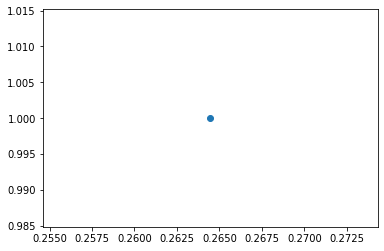

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
a=plt.axes()
a.scatter(X_data['account_length'][10],Y_data[10])
# a.set(xlabel='YrSold',ylabel='Predicted data',title='predicted plot')
# a.plot(X_data['account_length'],Y_modelpredict,linewidth=2)


# Question 4
* Ways to measure error haven't been discussed in class yet, but accuracy is an easy one to understand--it is simply the percent of labels that were correctly predicted (either true or false).

* Write a function to calculate accuracy using the actual and predicted labels.
* Using the function, calculate the accuracy of this K-nearest neighbors model on the data.

In [29]:
def accuracy(real, predict):
    return sum(real == predict) / float(real.shape[0])

In [30]:
accuracy(Y_test,Y_predict)
float(Y_test.shape[0])

NameError: name 'Y_test' is not defined

# Output - actual vs predicted
* accuracy btween y test data y predict : **0.89333**

In [31]:
accuracy(Y_data,Y_modelpredict)

0.9422

# Output - knn model
* accuracy btween y data and y modelpredict : **0.9422**

## Question 5

* Fit the K-nearest neighbors model again with `n_neighbors=3` but this time use distance for the weights. Calculate the accuracy using the function you created above. 
* Fit another K-nearest neighbors model. This time use uniform weights but set the power parameter for the Minkowski distance metric to be 1 (`p=1`) i.e. Manhattan Distance.

When weighted distances are used for part 1 of this question, a value of 1.0 should be returned for the accuracy. Why do you think this is? *Hint:* we are predicting on the data and with KNN the model *is* the data. We will learn how to avoid this pitfall in the next lecture.

# Part 1

# Model and Predict dataset 
* using knn classifier

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3,weights='distance')
# Fit the classifier to the data
knn.fit(X_data,Y_data)
Y_modelpredict = knn.predict(X_data)


# Plotting the predicted data
* plotting Y_predict data

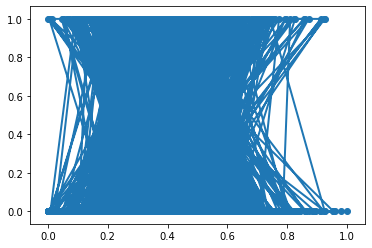

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
a=plt.axes()
a.scatter(X_data['account_length'],Y_data)
# a.set(xlabel='YrSold',ylabel='Predicted data',title='predicted plot')
a.plot(X_data['account_length'],Y_modelpredict,linewidth=2)


In [34]:
accuracy(Y_data,Y_modelpredict)

1.0

# output
* accuracy is 1,K-nearest neighbors model again with n_neighbors=3 but this time use distance for the weights. Calculate the accuracy using the function you created above.

# Part 2

# model predict accuracy
*  using knn classifier

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3,weights='uniform',p=1)
# Fit the classifier to the data
knn.fit(X_data,Y_data)
Y_modelpredict = knn.predict(X_data)
accuracy(Y_data,Y_modelpredict)

0.9456

# output
accuracy is 0.9456 . i.e minoswki distance

# R & D
* why minoswki? p=1?
* why uniform vs distance?
* why knn=3?


## Question 6

* Fit a K-nearest neighbors model using values of `k` (`n_neighbors`) ranging from 1 to 20. Use uniform weights (the default). The coefficient for the Minkowski distance (`p`) can be set to either 1 or 2--just be consistent. Store the accuracy and the value of `k` used from each of these fits in a list or dictionary.
* Plot (or view the table of) the `accuracy` vs `k`. What do you notice happens when `k=1`? Why do you think this is? *Hint:* it's for the same reason discussed above.

In [36]:
from sklearn.neighbors import KNeighborsClassifier
d={}
l=[]
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors = i,weights='uniform',p=1)
# Fit the classifier to the data
    knn.fit(X_data,Y_data)
    Y_modelpredict = knn.predict(X_data)
    l.append(accuracy(Y_data,Y_modelpredict))
d['accuracy']=l
d['k']=list(range(1,21))


In [ ]:
df=pd.DataFrame.from_dict(d)

# part 2
* plot of accuracy vs k

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

a=plt.axes()
a.scatter(df['k'],df['accuracy'])
a.set(xlabel='k',ylabel='accuracy',title='accuracy vs k plot')


# output
plot decreasing accuracy on increasing k value

# R & D
* why accuracy is decreasing?
* why k=1?
* why even k low ? odd high in graph?